In [70]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [71]:
df = pd.read_csv('./data/credit_card_default.csv')
df_clean = df.dropna()
df_clean.shape

(29403, 25)

In [72]:
a = list(df_clean.columns)
a.remove('default_payment_next_month')

In [73]:
target = df_clean['default_payment_next_month']
input = df_clean[a]
input = pd.get_dummies(input)  # 범주형 변수 모두 원핫 인코딩

smote = SMOTE(random_state=42)
s_input, s_target = smote.fit_resample(input,target)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(
    input, target, random_state=42, )

s_train_x, s_test_x, s_train_y, s_test_y = train_test_split(
    s_input, s_target, random_state=42, )

In [75]:
rf1 = RandomForestClassifier()
rf1.fit(train_x,train_y)
print('기본 적중률 : ', accuracy_score(test_y, rf1.predict(test_x)))

rf2 = RandomForestClassifier()
rf2.fit(s_train_x,s_train_y)
print('smote 적중률 : ', accuracy_score(s_test_y, rf2.predict(s_test_x)))

기본 적중률 :  0.8212488096857571
smote 적중률 :  0.8849982535801607


In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 기본 모델
rf1 = RandomForestClassifier()
rf1.fit(train_x, train_y)
pred1 = rf1.predict(test_x)
print('기본 모델 classification_report:')
print(classification_report(test_y, pred1))

# SMOTE 적용 모델
rf2 = RandomForestClassifier()
rf2.fit(s_train_x, s_train_y)
pred2 = rf2.predict(s_test_x)
print('SMOTE 모델 classification_report:')
print(classification_report(s_test_y, pred2))


기본 모델 classification_report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      5761
           1       0.66      0.38      0.48      1590

    accuracy                           0.82      7351
   macro avg       0.75      0.66      0.69      7351
weighted avg       0.81      0.82      0.80      7351

SMOTE 모델 classification_report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      5706
           1       0.92      0.84      0.88      5746

    accuracy                           0.88     11452
   macro avg       0.89      0.88      0.88     11452
weighted avg       0.89      0.88      0.88     11452



In [77]:
target.unique()

array([1, 0])

In [ ]:
df.shape

In [ ]:
from sklearn.datasets import make_classification

x, y = make_classification(n_samples=1000, n_features=10, n_informative=3,
                           n_redundant=0, n_clusters_per_class=1,
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

In [ ]:
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x,y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(
    x, y, random_state=42, )

In [ ]:
s_train_x, s_test_x, s_train_y, s_test_y = train_test_split(
    x_res, y_res, random_state=42, )

In [ ]:
rf = RandomForestClassifier()
rf.fit(train_x,train_y)
print(accuracy_score(test_y, rf.predict(test_x)))

In [ ]:
rfs = RandomForestClassifier()
rfs.fit(s_train_x,s_train_y)
print(accuracy_score(s_test_y, rfs.predict(s_test_x)))

In [80]:
import missingno

<Axes: >

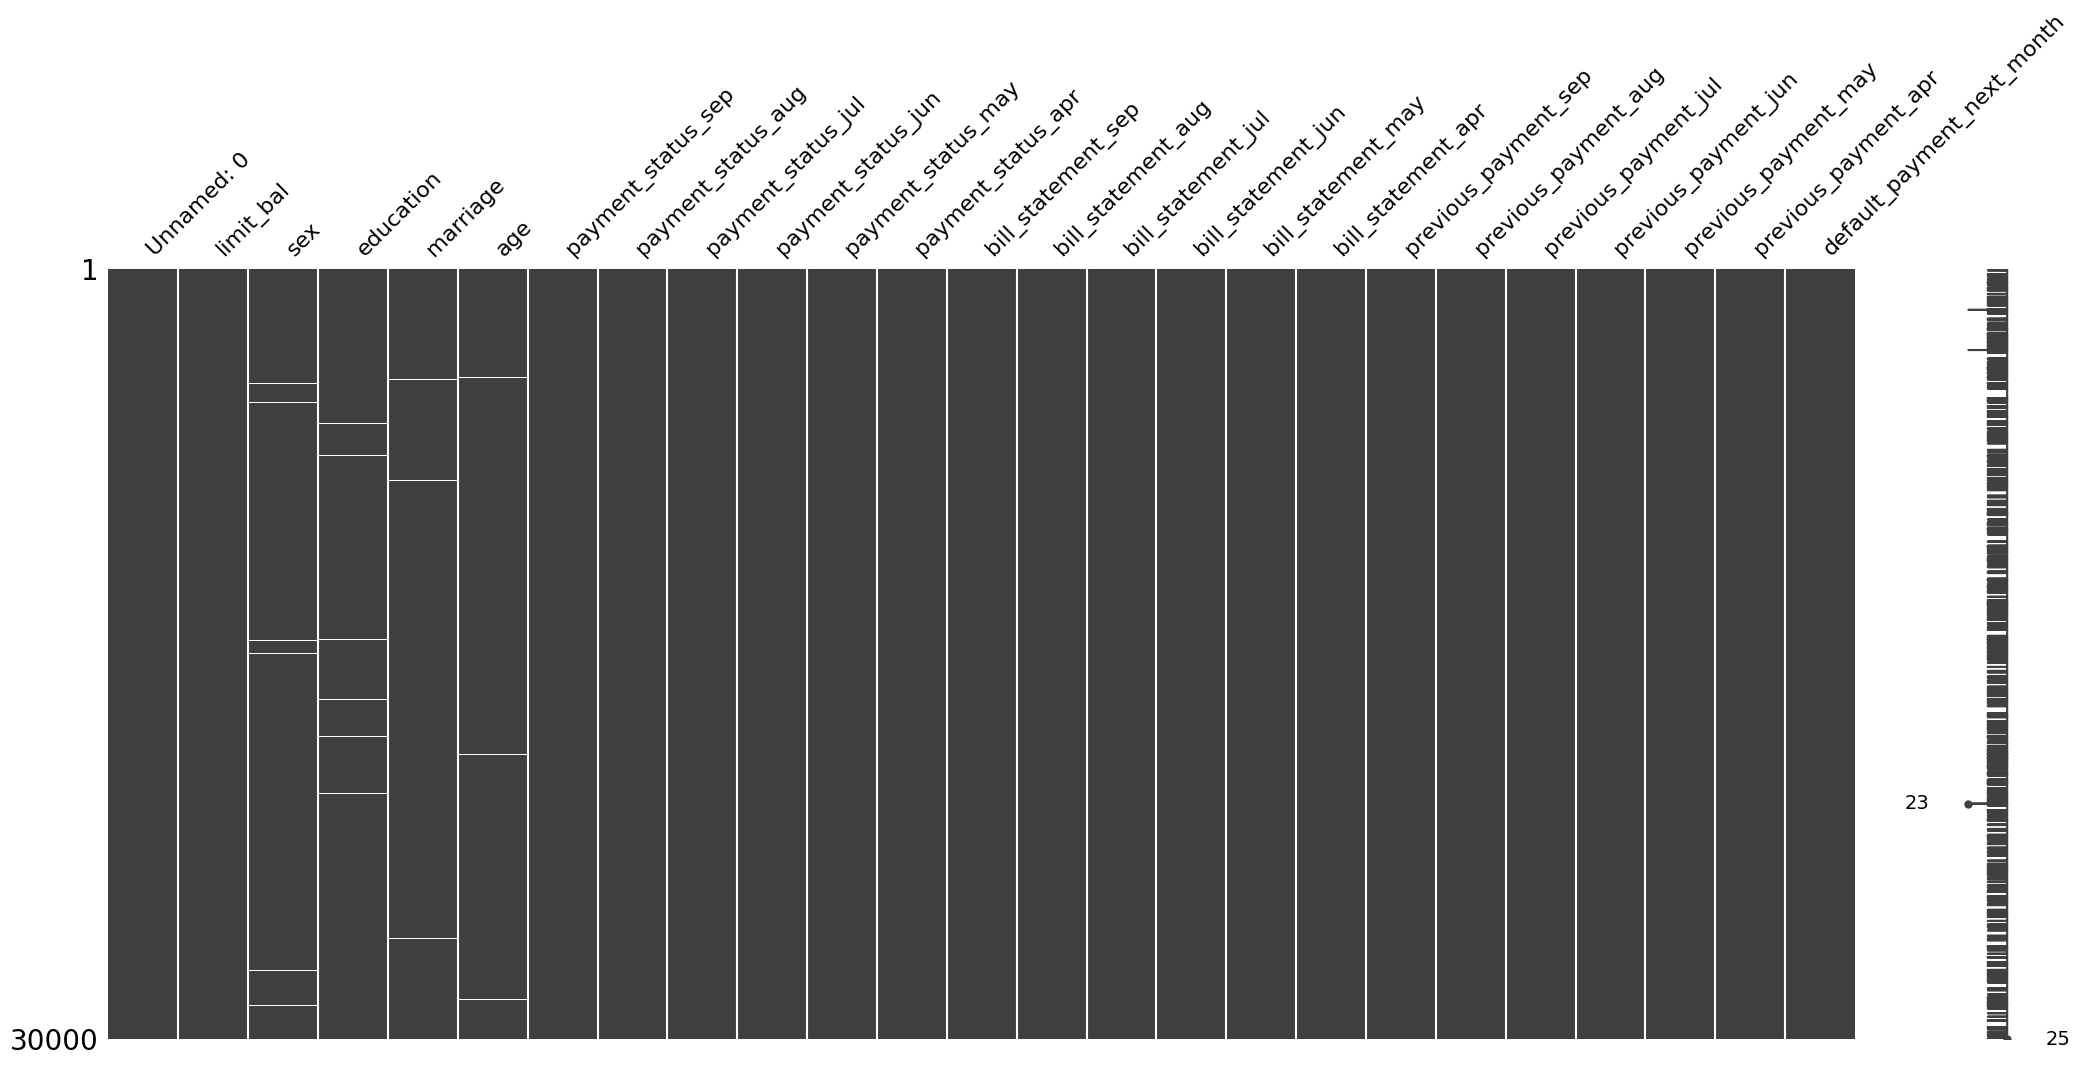

In [82]:
missingno.matrix(df)